In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import date, datetime, timedelta
from sklearn.cluster import KMeans
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.simplefilter('ignore', category=Warning, lineno=0, append=False)

# Importing Data

In [36]:
# import data
raw_df = pd.read_excel('../data/Online_Retail.xlsx')
raw_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Checking the data structure

This code block investigates the structure of the data. It displays informative summary statistics of the DataFrame.

In [37]:
# Understand data structure
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


Checking for the number of null values in the data. This will show us how many null values there are for each column.

In [38]:
raw_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data Cleaning

1. Drop unnecessary columns. In this case description.

2. Cleaning the data. Removing rows with 0 or less quantity.

3. Removing rows with missing customer ID.

4. Reseeting the index, to remove gaps caused by removed rows.

5. Display the cleaned data.

In [39]:
#Data Cleaning
# Drop 'Country' and 'InvoiceNo' columns
processed_df = raw_df.drop(['Description'], axis=1)

# Remove rows with quantity less than or equal to zero
processed_df = processed_df[processed_df['Quantity'] >= 0]

# Remove rows with missing CustomerID
processed_df = processed_df.dropna(subset=['CustomerID'])

# Reset the index after removing rows
processed_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the processed DataFrame
print(processed_df.head())

  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  CustomerID  \
0    536365    85123A         6 2010-12-01 08:26:00       2.55     17850.0   
1    536365     71053         6 2010-12-01 08:26:00       3.39     17850.0   
2    536365    84406B         8 2010-12-01 08:26:00       2.75     17850.0   
3    536365    84029G         6 2010-12-01 08:26:00       3.39     17850.0   
4    536365    84029E         6 2010-12-01 08:26:00       3.39     17850.0   

          Country  
0  United Kingdom  
1  United Kingdom  
2  United Kingdom  
3  United Kingdom  
4  United Kingdom  


# Data Analysis

## Analyse purchase patterns

1. Grouping and counting the data. A count column is created to display the number of occurrences in each group. The `reset_index()` transforms the grouping result into a regular DataFrame with the original grouping columns and the count column named as "Count".

2. Finding the maximim counts per country.

3. Selecting the most bought items from each country.

4. Displaying the results

In [40]:
# Group the data by 'Country' and 'StockCode', and count the occurrences
most_bought_per_country = processed_df.groupby(['Country', 'StockCode']).size().reset_index(name='Count')

# Find the index of the maximum count for each country
idx = most_bought_per_country.groupby('Country')['Count'].idxmax()

# Get the rows corresponding to the maximum count for each country
most_bought_items_per_country = most_bought_per_country.loc[idx]

print(most_bought_items_per_country)


                    Country StockCode  Count
87                Australia     21731      9
904                 Austria      POST     14
911                 Bahrain     22890      2
1697                Belgium      POST     96
1698                 Brazil     20679      1
1730                 Canada     10133      2
1879        Channel Islands     20725      7
2472                 Cyprus     22423      8
2805         Czech Republic     20972      1
3080                Denmark      POST     13
5022                   EIRE        C2     98
5073     European Community      POST      3
5531                Finland      POST     37
7053                 France      POST    300
8718                Germany      POST    374
8856                 Greece      POST      3
8886                Iceland     22375      6
8973                 Israel     20719      3
9651                  Italy      POST     17
9675                  Japan     21218      5
9867                Lebanon     21165      1
9916      

# Data Visualisation

This code block is used to create graphs to visualise the products sold in each country.

1. The top countries are selected. 

2. Using a for loop to iterate thorugh the countries.

3. Inside the loop. The data is filtered to only use the data of the current country.

4. The top 10 most bought items are selected for the current country.

5. Using the matplotlib, a figure is created. A pie chart is plotted, using `top_items` as the data, taking the item indexes as labels, and it displays percentages to one decimal.



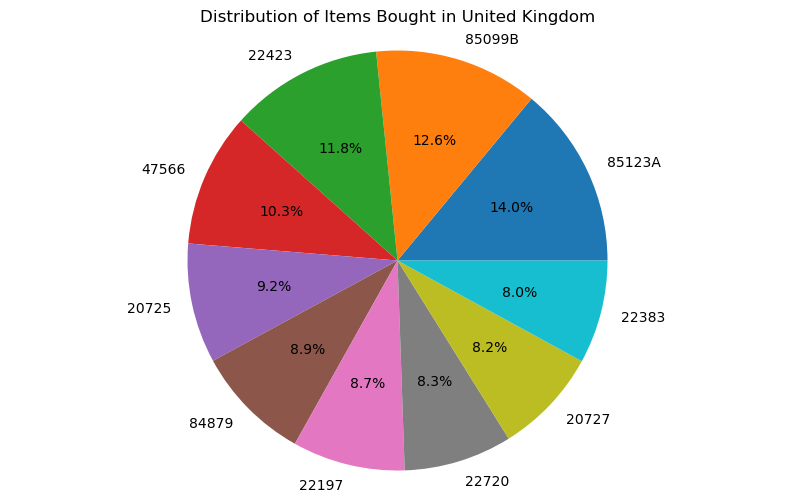

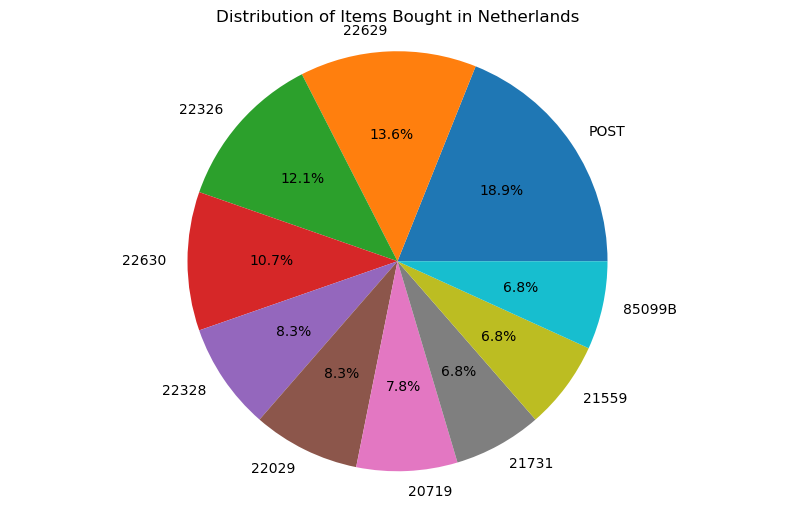

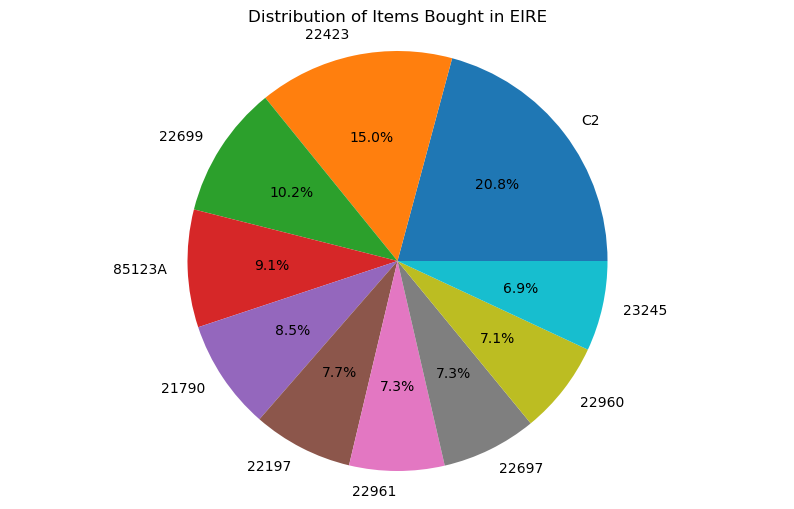

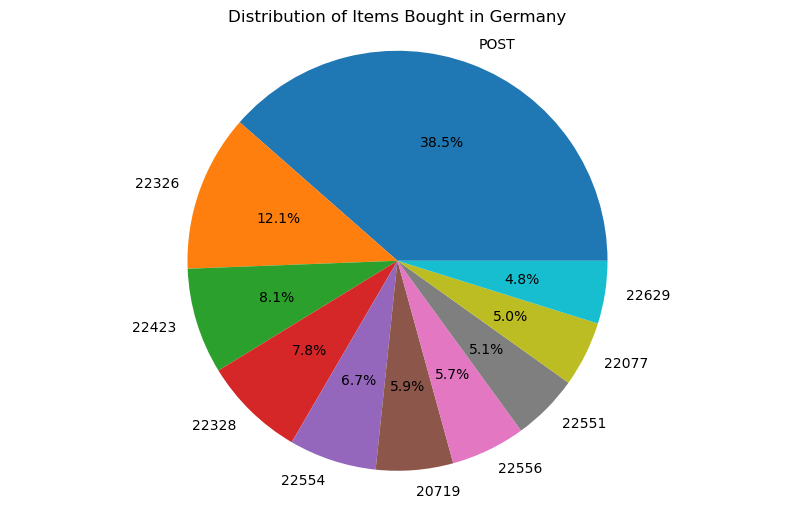

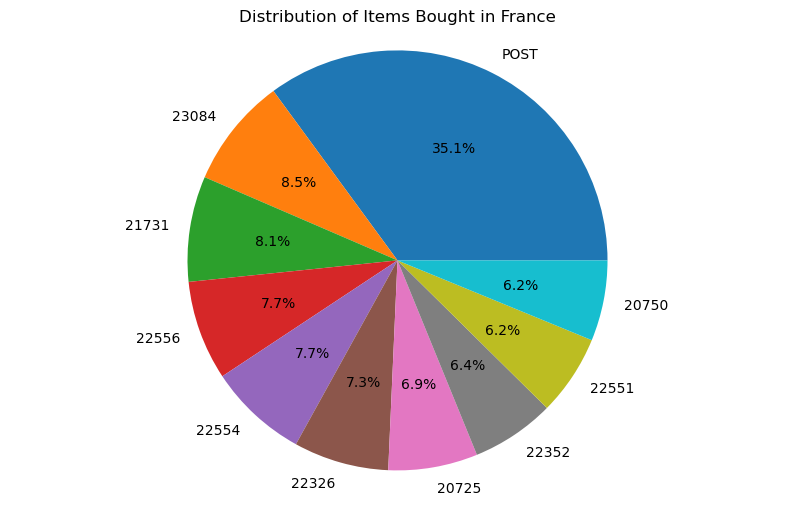

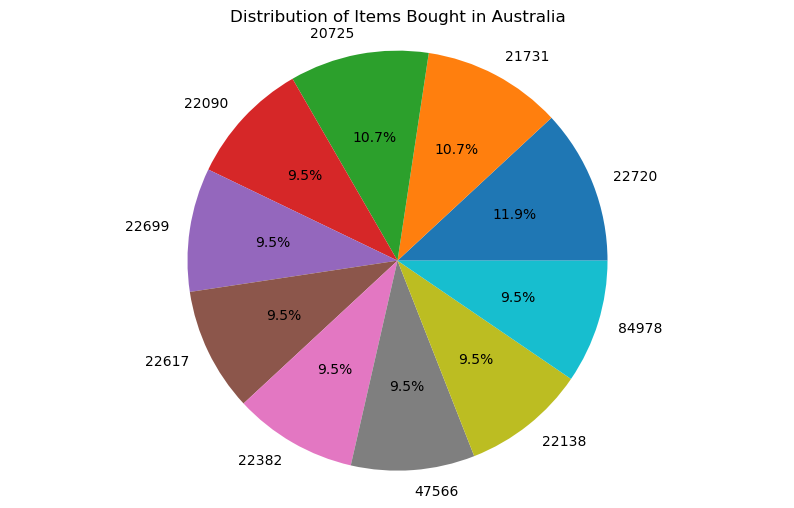

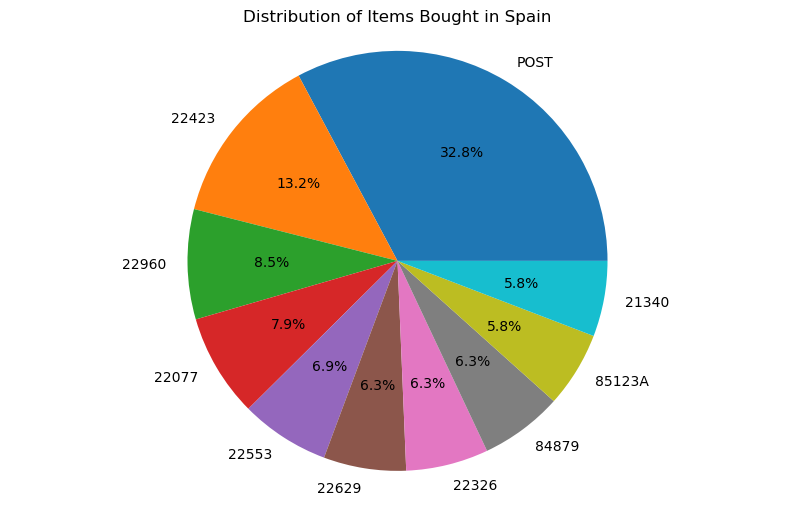

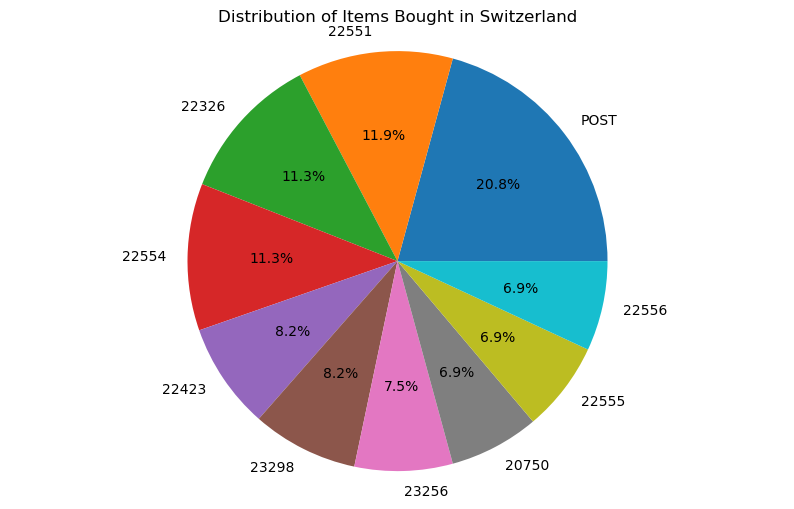

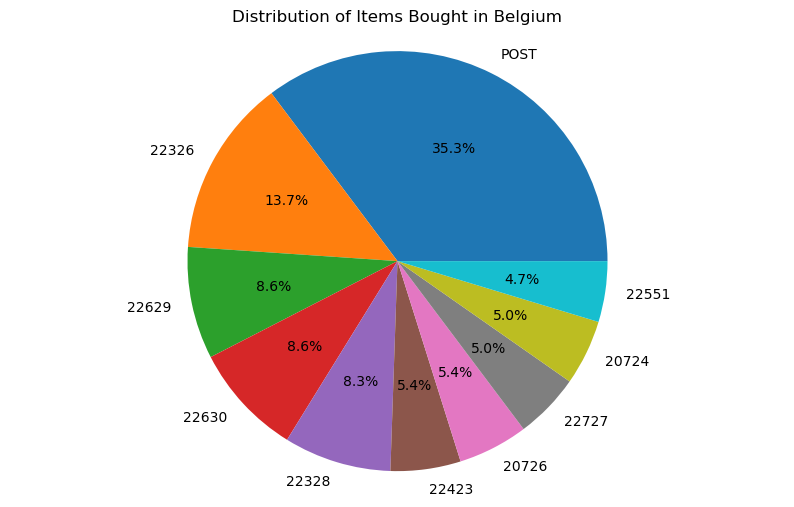

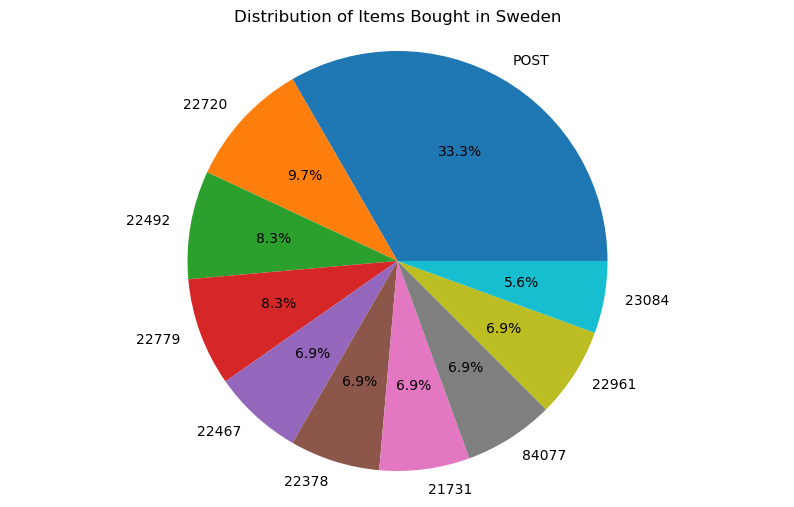

In [41]:
import matplotlib.pyplot as plt

# Define the top 10 countries by total amount
top_10_countries = country_total_amount_sorted.head(10)

# Loop through each country
for country_name in top_10_countries['Country']:
    # Filter the DataFrame to include only data for the specified country
    country_df = raw_df[raw_df['Country'] == country_name]
    
    # Count the occurrences of each item (StockCode) and select the top 10 most bought items
    top_items = country_df['StockCode'].value_counts().head(10)
    
    # Plot the distribution of items using a pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%')
    plt.title('Distribution of Items Bought in {}'.format(country_name))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


## Checking the shape of the data

The shape of the data frame is evaluated. Displaying that it has 37 rows and 3 columns.

In [42]:
print(most_bought_items_per_country.shape)

(37, 3)


# Data Processing

Data type conversions are done. Ensuring the "Quanitity" column contains integer values, and the "CustomerID" column contains strings.

In [43]:
#Data Processing
processed_df['Quantity'] = processed_df['Quantity'].astype(int)
processed_df['CustomerID'] = processed_df['CustomerID'].astype(str)
print(processed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Quantity     397924 non-null  int32         
 3   InvoiceDate  397924 non-null  datetime64[ns]
 4   UnitPrice    397924 non-null  float64       
 5   CustomerID   397924 non-null  object        
 6   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(4)
memory usage: 19.7+ MB
None


## Calculating the amount spent per customer

This code block calculates the amount spent per customer and saves the summary in a DataFrame. 

1. A new column named "Amount" is created in the `processed_df` DataFrame.

2. The data is then grouped by Customer, and then the amount column is summed to calculate the amount spent by each customer.

3. The index of the series is reset.

4. Columns are renamed to `CustomerID` and `Amount`.

5. The results are printed.

In [44]:
processed_df['Amount'] = processed_df['Quantity']*processed_df['UnitPrice']
rfm_ds_n = processed_df.groupby('CustomerID')['Amount'].sum()
rfm_ds_n.reset_index()
rfm_ds_n.columns = ['CustomerID', 'Amount']
print(rfm_ds_n)

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: Amount, Length: 4339, dtype: float64


## Calculating the frequency of each customer

This code block calculates the purchase frequency for each customer.

1. Data is grouped by Customer and then the invoice numbers assosiated with the customer ID is counted to check how many times a customer has placed an order.

2. Reset the index.

3. Rename the columns to `CustomerID` and `Frequency`.

4. Display the results.

In [45]:
rfm_ds_f = processed_df.groupby('CustomerID')['InvoiceNo'].count()
rfm_ds_f = rfm_ds_f.reset_index()
rfm_ds_f.columns = ['CustomerID','Frequency']
print(rfm_ds_f)

     CustomerID  Frequency
0       12346.0          1
1       12347.0        182
2       12348.0         31
3       12349.0         73
4       12350.0         17
...         ...        ...
4334    18280.0         10
4335    18281.0          7
4336    18282.0         12
4337    18283.0        756
4338    18287.0         70

[4339 rows x 2 columns]


## Calculating the recency of each customer purchase

This code block calculates how recently a customer purchases from the store. 

1. Converting the `InvoiceDate` column to  `DateTime` format.

2. Find the latest invoice date.

3. Calculate the recency. This is done by finding the difference between the maximum (latest) invoice date and each customer's invoice date. The difference indicates the time elapsed between the orders.

4. Group and find the minimum recency. Indicating the most recent purchase.

5. Reset the index of the series.

6. Rename the columns to `CustomerID` and `Diff`.

7. Calculate the recency in days. The `.dt` accessor is used to access datetime attributes, and `.days` extracts the number of days from the time difference.

8. Display the results.

In [46]:
processed_df['InvoiceDate'] = pd.to_datetime(processed_df['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(processed_df['InvoiceDate'])
processed_df['Diff'] = max_date - processed_df['InvoiceDate']
rfm_ds_p = processed_df.groupby('CustomerID')['Diff'].min()
rfm_ds_p = rfm_ds_p.reset_index()
rfm_ds_p.columns = ['CustomerID', 'Diff']
rfm_ds_p['Diff'] = rfm_ds_p['Diff'].dt.days
print(rfm_ds_p)

     CustomerID  Diff
0       12346.0   325
1       12347.0     1
2       12348.0    74
3       12349.0    18
4       12350.0   309
...         ...   ...
4334    18280.0   277
4335    18281.0   180
4336    18282.0     7
4337    18283.0     3
4338    18287.0    42

[4339 rows x 2 columns]


## Merging the data 

The data processed earlier (Purchace frequency, customer spending and recency) is combined into a single DataFrame.

In [47]:
rfm_ds_final = pd.merge(rfm_ds_n, rfm_ds_f, on='CustomerID',how='inner')
rfm_ds_final = pd.merge(rfm_ds_final, rfm_ds_p, on='CustomerID', how='inner')
rfm_ds_final.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm_ds_final = pd.merge(rfm_ds_final, processed_df[['CustomerID', 'Country']].drop_duplicates(), on='CustomerID', how='inner')

# Rename the columns
rfm_ds_final.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency', 'Country']
print(rfm_ds_final)

     CustomerID    Amount  Frequency  Recency         Country
0       12346.0  77183.60          1      325  United Kingdom
1       12347.0   4310.00        182        1         Iceland
2       12348.0   1797.24         31       74         Finland
3       12349.0   1757.55         73       18           Italy
4       12350.0    334.40         17      309          Norway
...         ...       ...        ...      ...             ...
4342    18280.0    180.60         10      277  United Kingdom
4343    18281.0     80.82          7      180  United Kingdom
4344    18282.0    178.05         12        7  United Kingdom
4345    18283.0   2094.88        756        3  United Kingdom
4346    18287.0   1837.28         70       42  United Kingdom

[4347 rows x 5 columns]


## Calculating the total amount spent per country.

In [48]:
country_total_amount = processed_df.groupby('Country')['Amount'].sum().reset_index()
country_total_amount.columns = ['Country', 'TotalAmount']
print(country_total_amount)

                 Country  TotalAmount
0              Australia   138521.310
1                Austria    10198.680
2                Bahrain      548.400
3                Belgium    41196.340
4                 Brazil     1143.600
5                 Canada     3666.380
6        Channel Islands    20450.440
7                 Cyprus    13590.380
8         Czech Republic      826.740
9                Denmark    18955.340
10                  EIRE   265545.900
11    European Community     1300.250
12               Finland    22546.080
13                France   209024.050
14               Germany   228867.140
15                Greece     4760.520
16               Iceland     4310.000
17                Israel     7221.690
18                 Italy    17483.240
19                 Japan    37416.370
20               Lebanon     1693.880
21             Lithuania     1661.060
22                 Malta     2725.590
23           Netherlands   285446.340
24                Norway    36165.440
25          

# Creating a bar chart

A bar chart is created to visualise the top 10 countirews contributing to the total spending.

In [49]:
import plotly.express as px

# Sort the DataFrame by 'TotalAmount' column in descending order
country_total_amount_sorted = country_total_amount.sort_values(by='TotalAmount', ascending=False)

# Select the top 10 rows
top_10_countries = country_total_amount_sorted.head(10)

# Create a bar graph
fig = px.bar(top_10_countries, x='Country', y='TotalAmount', 
             labels={'TotalAmount': 'Total Amount'}, 
             title='Top 10 Countries by Total Amount Spent')

# Show the plot
fig.show()


Below, the top 10 countries, with their total spending amounts are displayed.

In [50]:
print (top_10_countries)

           Country  TotalAmount
35  United Kingdom  7308391.554
23     Netherlands   285446.340
10            EIRE   265545.900
14         Germany   228867.140
13          France   209024.050
0        Australia   138521.310
30           Spain    61577.110
32     Switzerland    56443.950
3          Belgium    41196.340
31          Sweden    38378.330
